In [3]:
import pandas as pd
import json
import plotly

In [27]:
with open("ea_results copy.json") as json_file:
    data = json.load(json_file)

In [28]:
new_data = {}
row_number = 1
for generation, values in data.items():
    for individual, individual_values in values.items():
        if "agg_fitness" in individual_values.keys():
            new_data.update({str(row_number): {"Generation": generation, "population_number": individual, 
                                       "agg_fitness": individual_values["agg_fitness"],
                                       "cost": individual_values["fitness"][0],
                                       "throughput_time": individual_values["fitness"][1],
                                       "throughput": individual_values["fitness"][2],
                                       "wip": individual_values["fitness"][3],
                                      }})
            row_number += 1
df = pd.DataFrame(new_data)
df = df.T

In [29]:
df.head(50)

,Generation,population_number,agg_fitness,cost,throughput_time,throughput,wip
1,0,26,-2563.691814,46000.0,29.742983,2742.0,10.565203
2,0,74,2069.687995,99000.0,218.187995,185.0,1739.5
3,0,88,1702.844572,3000.0,211.344572,193.0,1675.5
4,0,95,2084.092228,3000.0,278.092228,43.0,1840.0
5,0,117,-2563.691814,46000.0,29.742983,2742.0,10.565203
6,0,119,1665.668561,3000.0,206.168561,207.0,1657.5
7,0,126,1702.844572,3000.0,211.344572,193.0,1675.5
8,0,133,2058.581957,96000.0,202.581957,177.0,1745.0
9,0,137,-2563.691814,46000.0,29.742983,2742.0,10.565203
10,0,139,2069.687995,99000.0,218.187995,185.0,1739.5


In [30]:
df.columns

Index(['Generation', 'population_number', 'agg_fitness', 'cost',
       'throughput_time', 'throughput', 'wip'],
      dtype='object')

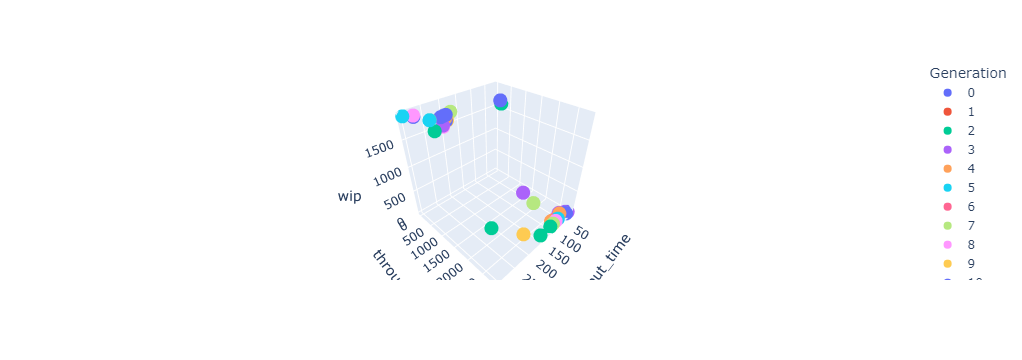

In [32]:
import plotly.express as px

fig = px.scatter_3d(df, x='throughput_time', y='throughput', z='wip',
              color='Generation')
fig.show()